## Salary Data Linear Regression Model

### We are trying to predict the salaries of a certain company based on a small dataset given by the company which contains the number of years served vs the salary.

First we import the required libraries to aid us to fit an regression model to the given dataset. 

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Now we read the dataset into the dataframe dataset by providing the appropriate path for the dataset Salary_Data.csv and get the feature array X and the salary values in Y array

In [50]:
dataset = pd.read_csv("../../Data Analysis Data/Salary_Data.csv")
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,-1].values
dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


A common practice in Machine Learning is to split the data available to training and test sets so that we can also have an idea about the performance of our model. Here I split 20% of the dataset to test set and remaining 80% to training.
Remember the dataset used here is really small so normally we shouldn't go for splitting the training data as that will reduce the data on which our model can train on and affect the accuracy

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)

Now lets's fit our model to the dataset

In [70]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Here we predict the values for the test set and compare them with the actual salary given in the dataset.

In [73]:
y_pred = regressor.predict(X_test)
predicted_results = pd.DataFrame({'Years of Experience': X_test.reshape(X_test.size),
                                  'Salary_Predicted':y_pred.reshape(y_pred.size),
                                  'Salary_Actual':Y_test.reshape(Y_test.size), 
                                  'Difference in predicted values': y_pred.reshape(y_pred.size) - Y_test.reshape(Y_test.size)})
predicted_results

,Years of Experience,Salary_Predicted,Salary_Actual,Difference in predicted values
0,8.7,106989.662938,109431.0,-2441.337062
1,6.8,89245.822498,91738.0,-2492.177502
2,4.0,63097.005008,55794.0,7303.005008
3,8.2,102320.231243,113812.0,-11491.768757
4,1.3,37882.073856,46205.0,-8322.926144
5,7.9,99518.572226,101302.0,-1783.427774


We see that there is difference of the order 10e4 which shows that our model isn't performing well. This is because we have too little data to train our model with. Gaining more data will definitely help our model perform better.

Let us plot regressor line and the real points on a plot in order to visualize how regression works.

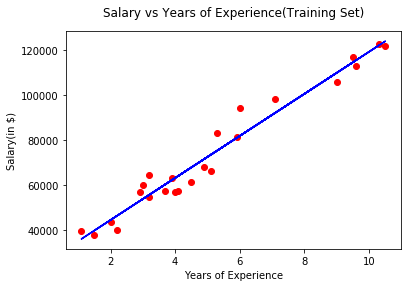

In [40]:
plt.scatter(X_train, Y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Years of Experience(Training Set)',{'fontsize':12, 'color':'black'},pad = 15)
plt.xlabel('Years of Experience',{'fontsize':10})
plt.ylabel('Salary(in $)',{'fontsize':10})
plt.show()

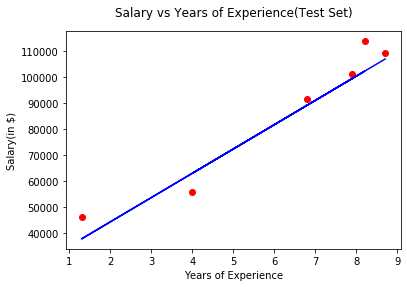

In [45]:
plt.scatter(X_test, Y_test, color = 'red')
plt.plot(X_test, y_pred, color = 'blue')
plt.title('Salary vs Years of Experience(Test Set)',{'fontsize':12, 'color':'black'},pad = 15)
plt.xlabel('Years of Experience',{'fontsize':10})
plt.ylabel('Salary(in $)',{'fontsize':10})
plt.show()